In [164]:
import numpy as np

In [165]:
import kwant
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

In [199]:
A1, A2, A3 = 1, 2, 3
x1, x2 = 3, 7

def A(x):
    return (A1 * heaviside(-(x-x1)) +
            A2 * heaviside(x-x1) * heaviside(-(x-x2)) + 
            A3 * heaviside(x-x2))
    

In [200]:
x = np.arange(0,10,0.1)
y = A(x)

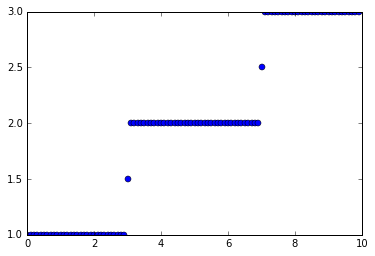

In [201]:
plt.plot(x,y, 'o')

In [161]:
a = 0.25
lengths = [3, 2, 3]
num_points = [int(L/a) for L in lengths]


N = sum(num_points)
L = sum(lengths)

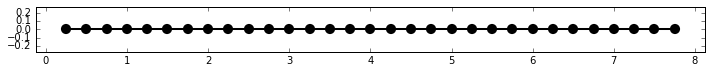

In [162]:
def shape(pos):
    (x, ) = pos
    return (0 < x < L)

lat = kwant.lattice.chain(a)
sys = kwant.Builder()

sys[lat.shape(shape, (1, ))] = 2*A/a**2
sys[kwant.HoppingKind((1, ), lat)] = -A/a**2

kwant.plot(sys, fig_size=(12,8));

In [143]:
sys = sys.finalized()

In [131]:
import scipy.linalg as la
import numpy as np

In [132]:
ham = sys.hamiltonian_submatrix()

In [133]:
ev, evec = la.eigh(ham)

In [134]:
x = [s.pos[0] for s in sys.sites]

In [135]:
indx = np.argsort(x)

In [136]:
evec = evec[indx, :]

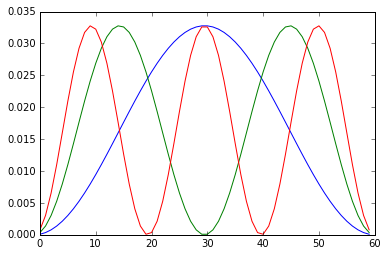

In [137]:
for i in range(3):
    plt.plot(np.abs(evec[:,i])**2)

(0, 5)

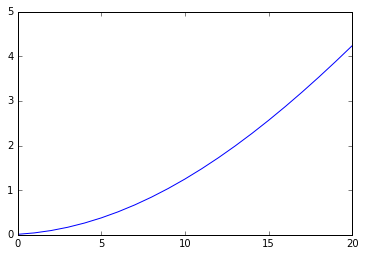

In [138]:
plt.plot(ev)
plt.xlim(0,20)
plt.ylim(0,5)